In [1]:
import pandas as pd
import numpy as np

# pd.set_option('display.float_format', lambda x: f'{int(x)}')
pd.set_option('display.float_format', '{:.3f}'.format)

df = pd.read_csv("times.csv")
# df['nblocks'] = df['nblocks'].astype('int64')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   @@@                   1553 non-null   object 
 1   filename              1553 non-null   object 
 2   nblocks               1550 non-null   float64
 3   ninst                 1550 non-null   float64
 4   time_tr_subset        1553 non-null   int64  
 5   time_comp_subset      1553 non-null   int64  
 6   time_checker_subset   1553 non-null   int64  
 7   msg_subset            1553 non-null   object 
 8   time_tr_optimal       1553 non-null   int64  
 9   time_comp_optimal     1553 non-null   int64  
 10  time_checker_optimal  1553 non-null   int64  
 11  msg_optimal           1553 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 145.7+ KB


,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal
count,1550.000,1550.000,1553.000,1553.000,1553.000,1553.000,1553.000,1553.000
mean,44.059,141.683,38277312.726,14317794974.559,3101822.175,37619416.722,14393416076.799,3102107.448
std,51.912,194.252,3830770.250,78103660351.922,3744656.127,3940997.835,80031440643.748,3721257.952
min,2.000,7.000,34354244.000,1347931690.000,2078982.000,34717549.000,1357490534.000,2104951.000
25%,16.000,42.000,36393720.000,4813643824.000,2329044.000,35813192.000,4796435461.000,2327610.000
50%,28.000,80.000,37396133.000,5943535914.000,2468431.000,36608220.000,5954368261.000,2473243.000
75%,52.000,165.000,39022075.000,9027431416.000,2875955.000,38063815.000,9063147822.000,2870776.000
max,562.000,2799.000,84047088.000,2170919257524.000,93771905.000,82491285.000,2226154992112.000,92282629.000


In [2]:
df_tr_error = df[(df["msg_subset"] == "TRANSLATION_RUNTIME_ERROR") | (df["msg_optimal"] == "TRANSLATION_RUNTIME_ERROR")]
df_tr_error

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
785,@@@,python/semanticTests_cfg/experimental_stub__st...,NaN,NaN,84047088,1408468871,2477795,TRANSLATION_RUNTIME_ERROR,82491285,1404404743,2529018,TRANSLATION_RUNTIME_ERROR
855,@@@,python/semanticTests_cfg/experimental_type_cla...,NaN,NaN,79294930,1347931690,2332760,TRANSLATION_RUNTIME_ERROR,78899901,1357490534,2323944,TRANSLATION_RUNTIME_ERROR
894,@@@,python/semanticTests_cfg/reverts_eof_revert_re...,NaN,NaN,80227048,3043937034,5287227,TRANSLATION_RUNTIME_ERROR,79069524,3048911859,5282629,TRANSLATION_RUNTIME_ERROR


In [3]:
df = df[(df["msg_subset"] != "TRANSLATION_RUNTIME_ERROR") & (df["msg_optimal"] != "TRANSLATION_RUNTIME_ERROR")]
df['nblocks'] = df['nblocks'].astype('int64')
df['ninst'] = df['ninst'].astype('int64')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 0 to 1552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   @@@                   1550 non-null   object
 1   filename              1550 non-null   object
 2   nblocks               1550 non-null   int64 
 3   ninst                 1550 non-null   int64 
 4   time_tr_subset        1550 non-null   int64 
 5   time_comp_subset      1550 non-null   int64 
 6   time_checker_subset   1550 non-null   int64 
 7   msg_subset            1550 non-null   object
 8   time_tr_optimal       1550 non-null   int64 
 9   time_comp_optimal     1550 non-null   int64 
 10  time_checker_optimal  1550 non-null   int64 
 11  msg_optimal           1550 non-null   object
dtypes: int64(8), object(4)
memory usage: 157.4+ KB


,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal
count,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000
mean,44.059,141.683,38194256.515,14341764682.513,3101311.004,37537092.554,14417525393.634,3101572.436
std,51.912,194.252,3334920.073,78177345662.496,3747784.745,3470678.890,80107016165.556,3724366.714
min,2.000,7.000,34354244.000,3785019667.000,2078982.000,34717549.000,3785819120.000,2104951.000
25%,16.000,42.000,36393309.000,4817875661.250,2328316.500,35812723.250,4798390287.000,2327624.250
50%,28.000,80.000,37389613.000,5946119173.000,2468285.500,36596785.000,5956743216.500,2473035.500
75%,52.000,165.000,39015964.000,9048503919.250,2875885.000,38061768.250,9076091921.250,2870316.250
max,562.000,2799.000,77593120.000,2170919257524.000,93771905.000,82231156.000,2226154992112.000,92282629.000


In [4]:
df_diff = df[df["msg_subset"] != df["msg_optimal"]]
df_diff

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal


In [5]:
df_diff_times = df[df["time_checker_subset"] != df["time_checker_optimal"]]
df_diff_times

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
0,@@@,python/semanticTests_cfg/strings_empty_string_...,60,196,40979985,9395696002,2892339,LIVENESS_VALID,38129517,9426169523,2856855,LIVENESS_VALID
1,@@@,python/semanticTests_cfg/viaYul_dirty_memory_s...,18,62,38256744,5699161276,2384050,LIVENESS_VALID,36335302,5651824255,2338028,LIVENESS_VALID
2,@@@,python/semanticTests_cfg/libraries_internal_li...,16,38,37242109,5562587714,2278569,LIVENESS_VALID,37176318,5594790654,2422599,LIVENESS_VALID
3,@@@,python/semanticTests_cfg/operators_shifts_shif...,21,53,38176795,5631679670,2373986,LIVENESS_VALID,35569751,5611317181,2474438,LIVENESS_VALID
4,@@@,python/semanticTests_cfg/types_convert_fixed_b...,12,27,35996717,5164905700,2298070,LIVENESS_VALID,35650393,5191032254,2210959,LIVENESS_VALID
...,...,...,...,...,...,...,...,...,...,...,...,...
1548,@@@,python/semanticTests_cfg/functionCall_value_te...,10,25,36840193,4059860936,2164298,LIVENESS_VALID,35146572,4069702986,2221661,LIVENESS_VALID
1549,@@@,python/semanticTests_cfg/array_copying_array_c...,84,379,41911444,21776370539,4335483,LIVENESS_VALID,40720094,21963687587,4376338,LIVENESS_VALID
1550,@@@,python/semanticTests_cfg/immutable_getter_call...,73,211,39392082,8336293689,2992357,LIVENESS_VALID,38256009,8342357541,3030611,LIVENESS_VALID
1551,@@@,python/semanticTests_cfg/structs_delete_struct...,36,115,38834343,5336251089,2671197,LIVENESS_VALID,36566235,5280979619,2410214,LIVENESS_VALID


In [6]:
df_fast = df[df["time_checker_subset"] == 2078982]
df_fast

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
198,@@@,python/semanticTests_cfg/constructor_payable_c...,2,7,36269003,4078196009,2078982,LIVENESS_VALID,35241523,4057933584,2184960,LIVENESS_VALID


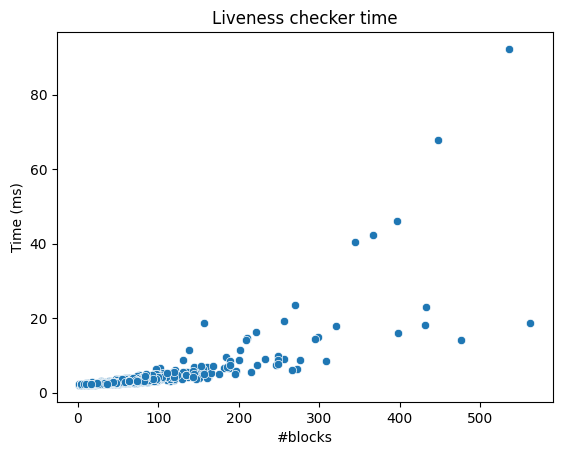

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_checker_optimal_ms"] = df["time_checker_optimal"] / 10**6

sns.scatterplot(data=df, x="nblocks", y="time_checker_optimal_ms")

plt.xlabel("#blocks")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time")
plt.savefig("times_blocks.png", dpi=500, bbox_inches='tight')
plt.show()


Coeficientes: [1.59678587e-04 1.51268447e-03 2.29491339e+00]
R²: 0.661779670548327


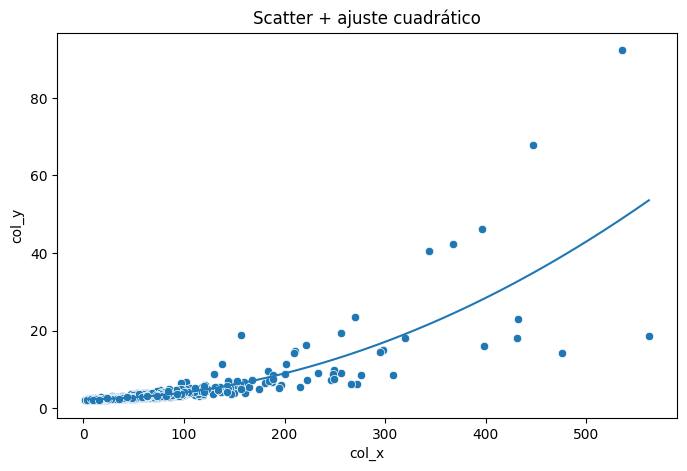

In [8]:
import numpy as np

x = df["nblocks"]
y = df["time_checker_optimal_ms"]

# Ajuste cuadrático (grado 2)
coef = np.polyfit(x, y, 2)
a, b, c = coef
print("Coeficientes:", coef)

# Polinomio resultante
p = np.poly1d(coef)


y_pred = p(x)

# Cálculo del R²
ss_res = ((y - y_pred)**2).sum()
ss_tot = ((y - y.mean())**2).sum()

r2 = 1 - ss_res / ss_tot
print("R²:", r2)


df["time_comp_optimal_ms_fit"] = p(df["nblocks"])



# Crear puntos para la curva suave
xs = np.linspace(x.min(), x.max(), 300)
ys = p(xs)

# Dibujar scatter + curva
plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y)   # Scatter con seaborn
plt.plot(xs, ys)            # Curva ajustada

plt.xlabel("col_x")
plt.ylabel("col_y")
plt.title("Scatter + ajuste cuadrático")
plt.show()


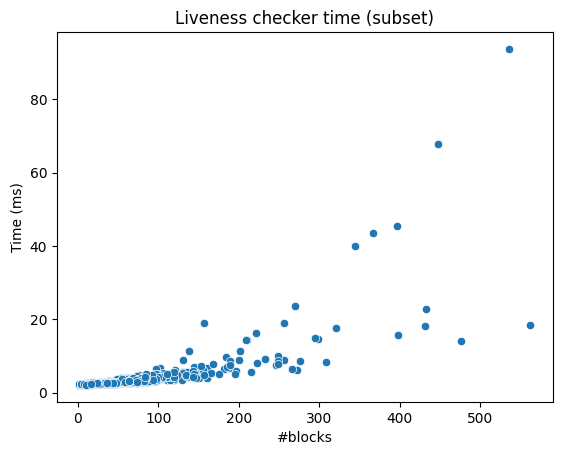

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_checker_subset_ms"] = df["time_checker_subset"] / 10**6

sns.scatterplot(data=df, x="nblocks", y="time_checker_subset_ms")

plt.xlabel("#blocks")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time (subset)")
plt.savefig("times_instr.png", dpi=500, bbox_inches='tight')
plt.show()

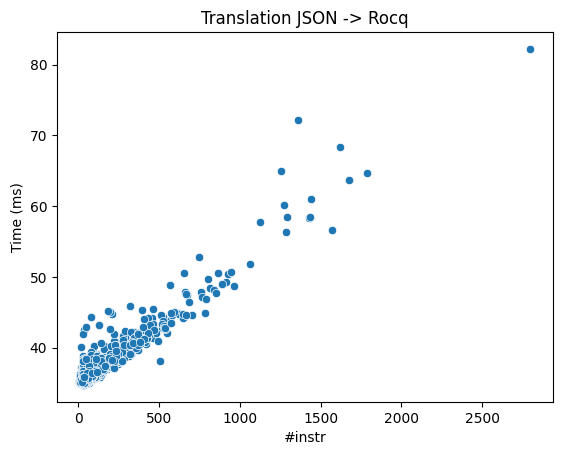

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_tr_optimal_ms"] = df["time_tr_optimal"] / 10**6

sns.scatterplot(data=df, x="ninst", y="time_tr_optimal_ms")

plt.xlabel("#instr")
plt.ylabel("Time (ms)")
plt.title("Translation JSON -> Rocq")
plt.savefig("tr_time_instr.png", dpi=500, bbox_inches='tight')
plt.show()

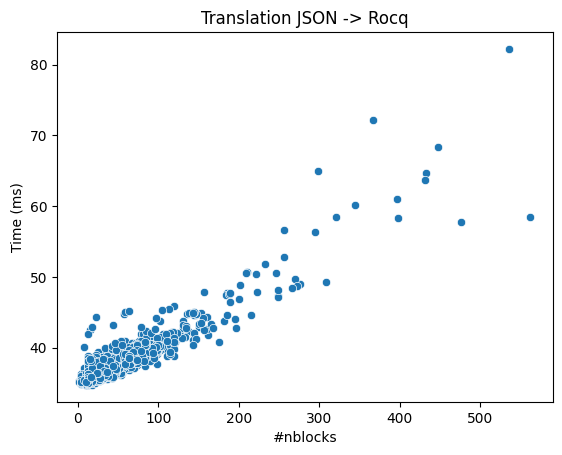

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_tr_optimal_ms"] = df["time_tr_optimal"] / 10**6

sns.scatterplot(data=df, x="nblocks", y="time_tr_optimal_ms")

plt.xlabel("#nblocks")
plt.ylabel("Time (ms)")
plt.title("Translation JSON -> Rocq")
plt.savefig("tr_time_blocks.png", dpi=500, bbox_inches='tight')
plt.show()

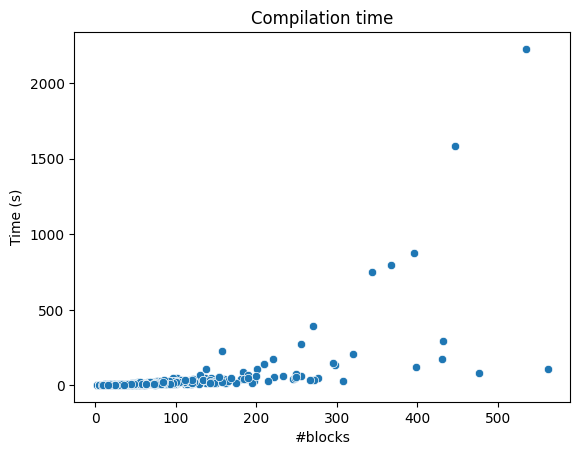

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_comp_optimal_ms"] = df["time_comp_optimal"] / 10**9

sns.scatterplot(data=df, x="nblocks", y="time_comp_optimal_ms")

plt.xlabel("#blocks")
plt.ylabel("Time (s)")
plt.title("Compilation time")
plt.savefig("comp_blocks.png", dpi=500, bbox_inches='tight')
plt.show()


In [13]:
df["nblocks^2"] = df["nblocks"] ** 2
df[["nblocks", "nblocks^2", "time_comp_optimal_ms"]].corr()

,nblocks,nblocks^2,time_comp_optimal_ms
nblocks,1.000,0.885,0.557
nblocks^2,0.885,1.000,0.688
time_comp_optimal_ms,0.557,0.688,1.000


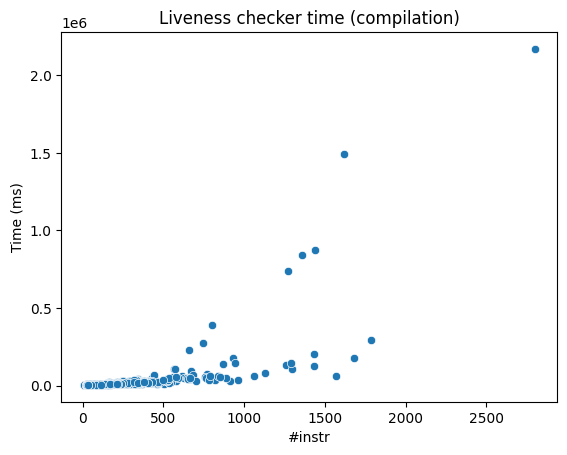

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_comp_subset_ms"] = df["time_comp_subset"] / 10**6

sns.scatterplot(data=df, x="ninst", y="time_comp_subset_ms")

plt.xlabel("#instr")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time (compilation)")
plt.savefig("comp_instr.png", dpi=500, bbox_inches='tight')
plt.show()

In [15]:
t = df[["time_tr_subset", "time_comp_subset", "time_checker_subset", "time_tr_optimal", "time_comp_optimal", "time_checker_optimal"]].sum()
t
# print(f"Total time: {t/(1000*60*60)} h")

time_tr_subset             59201097598
time_comp_subset        22229735257895
time_checker_subset         4807032056
time_tr_optimal            58182493459
time_comp_optimal       22347164360133
time_checker_optimal        4807437276
dtype: int64

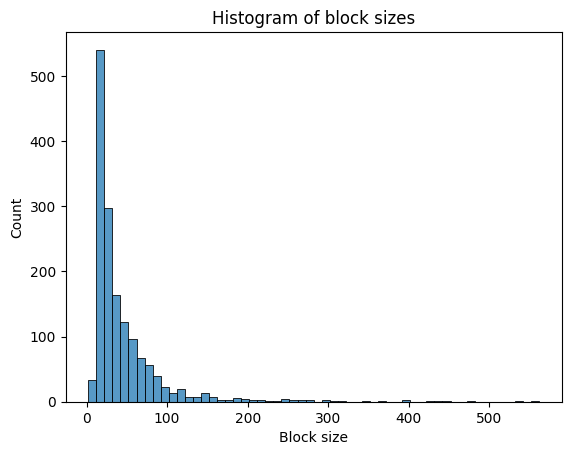

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["nblocks"], binwidth=10)
plt.title("Histogram of block sizes")
plt.xlabel("Block size")
plt.savefig("hist_blocks.png", dpi=500, bbox_inches='tight')
plt.show()

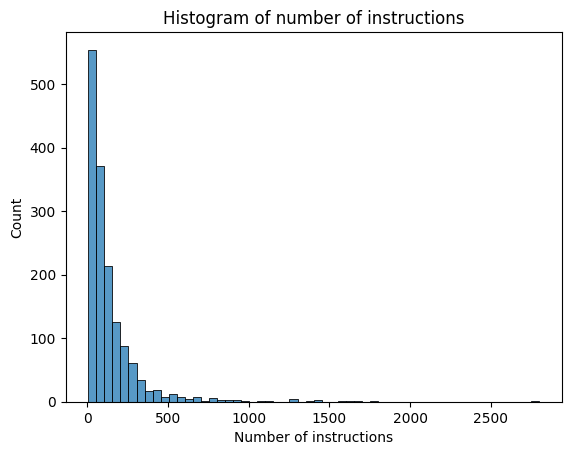

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["ninst"], binwidth=50)
plt.title("Histogram of number of instructions")
plt.xlabel("Number of instructions")
plt.savefig("hist_inst.png", dpi=500, bbox_inches='tight')
plt.show()

In [18]:
df[df['time_checker_optimal'] >= 5000000]

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal,time_checker_optimal_ms,time_comp_optimal_ms_fit,time_checker_subset_ms,time_tr_optimal_ms,time_comp_optimal_ms,nblocks^2,time_comp_subset_ms
11,@@@,python/semanticTests_cfg/externalContracts_str...,246,653,48308131,41990366625,7445161,LIVENESS_VALID,50561200,41998459494,7372903,LIVENESS_VALID,7.373,12.330,7.445,50.561,41998.459,60516,41990.367
44,@@@,python/semanticTests_cfg/abiEncoderV1_abi_enco...,185,664,47961388,46002776905,6929194,LIVENESS_VALID,47740200,45882936187,6975207,LIVENESS_VALID,6.975,8.040,6.929,47.740,45882.936,34225,46002.777
64,@@@,python/semanticTests_cfg/tryCatch_invalid_erro...,308,913,48764998,30005479832,8433009,LIVENESS_VALID,49285623,29808621075,8530765,LIVENESS_VALID,8.531,17.909,8.433,49.286,29808.621,94864,30005.480
78,@@@,python/semanticTests_cfg/array_copying_copy_by...,184,672,47501655,90626350622,9594323,LIVENESS_VALID,47391335,89985702584,9616119,LIVENESS_VALID,9.616,7.979,9.594,47.391,89985.703,33856,90626.351
95,@@@,python/semanticTests_cfg/array_copying_nested_...,344,1272,60516262,737296664904,40105652,LIVENESS_VALID,60180494,747580657798,40454067,LIVENESS_VALID,40.454,21.711,40.106,60.180,747580.658,118336,737296.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,@@@,python/semanticTests_cfg/array_copying_nested_...,431,1679,65808570,176002368364,18178431,LIVENESS_VALID,63657916,176307748390,18075953,LIVENESS_VALID,18.076,32.609,18.178,63.658,176307.748,185761,176002.368
1499,@@@,python/semanticTests_cfg/abiEncoderV2_calldata...,200,791,46126823,64347841532,8914995,LIVENESS_VALID,46863306,63659424627,8875639,LIVENESS_VALID,8.876,8.985,8.915,46.863,63659.425,40000,64347.842
1531,@@@,python/semanticTests_cfg/structs_copy_substruc...,295,1289,55001153,146435315384,14756198,LIVENESS_VALID,56372163,146190843890,14476664,LIVENESS_VALID,14.477,16.637,14.756,56.372,146190.844,87025,146435.315
1534,@@@,python/semanticTests_cfg/calldata_calldata_arr...,111,495,44411005,33887852204,5182126,LIVENESS_VALID,40862517,33941266639,5250898,LIVENESS_VALID,5.251,4.430,5.182,40.863,33941.267,12321,33887.852


In [19]:
df[df['nblocks'] == 562]

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal,time_checker_optimal_ms,time_comp_optimal_ms_fit,time_checker_subset_ms,time_tr_optimal_ms,time_comp_optimal_ms,nblocks^2,time_comp_subset_ms
1217,@@@,python/semanticTests_cfg/externalContracts_prb...,562,1295,58627673,105795291457,18452494,LIVENESS_VALID,58493846,106031121926,18601665,LIVENESS_VALID,18.602,53.579,18.452,58.494,106031.122,315844,105795.291


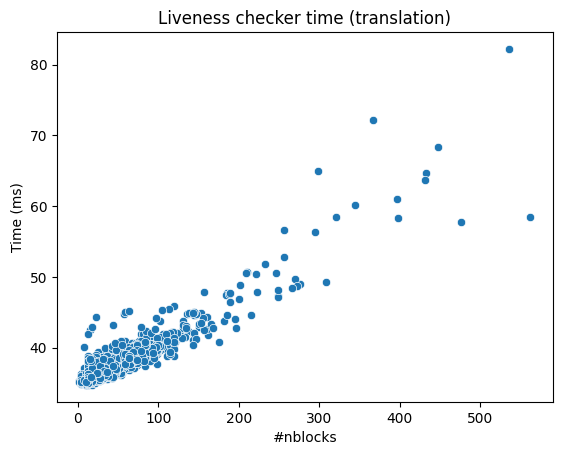

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df["time_tr_optimal_ms"] = df["time_tr_optimal"] / 10**6


sns.scatterplot(data=df, x="nblocks", y="time_tr_optimal_ms")

plt.xlabel("#nblocks")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time (translation)")
# plt.savefig("comp_instr.png", dpi=500, bbox_inches='tight')
plt.show()